# 复习

* 收益率，连续收益率，单期收益率与多期收益率的关系

* 风险,夏普率

## 掘金多股价数据处理-数据变形与空值处理

https://blog.csdn.net/qq_17753903/article/details/89892631

In [70]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import akshare as ak

In [48]:
from gm.api import *
import pandas as pd
import numpy as np

set_token("eea4b28a3ceb7048603d388bb777ebc67de47385")

In [3]:
#000413 东旭光电，000063 中兴通讯，002007 华兰生物，000001 平安银行，000002 万科A
stock_n = history(symbol='SZSE.000413,SZSE.000063,SZSE.002007,SZSE.000001,SZSE.000002', frequency='1d', start_time='2015-01-01',  end_time='2015-12-31', fields='symbol,open, close, low, high, eob', adjust=ADJUST_PREV, df= True)
stock_n

,symbol,open,close,low,high,eob
0,SZSE.000001,10.1555,10.1745,9.9078,10.3396,2015-01-05 00:00:00+08:00
1,SZSE.000002,10.9058,11.2999,10.7770,11.5879,2015-01-05 00:00:00+08:00
2,SZSE.000063,14.7448,15.0698,14.5070,15.3473,2015-01-05 00:00:00+08:00
3,SZSE.002007,10.0151,9.9189,9.7445,10.0693,2015-01-05 00:00:00+08:00
4,SZSE.000001,10.0665,10.0221,9.8760,10.4095,2015-01-06 00:00:00+08:00
...,...,...,...,...,...,...
1176,SZSE.002007,13.5467,13.6924,13.5103,14.0841,2015-12-30 00:00:00+08:00
1177,SZSE.000001,9.3036,9.2190,9.2113,9.3267,2015-12-31 00:00:00+08:00
1178,SZSE.000413,8.8681,8.7051,8.7051,8.9448,2015-12-31 00:00:00+08:00
1179,SZSE.000063,18.3058,17.8835,17.8739,18.3058,2015-12-31 00:00:00+08:00


In [4]:
def time_str(x):
    return str(x.date())

stock_n.eob=stock_n.eob.apply(time_str)

In [80]:
stock_n

,symbol,open,close,low,high,eob
0,SZSE.000001,10.1555,10.1745,9.9078,10.3396,2015-01-05
1,SZSE.000002,10.9058,11.2999,10.7770,11.5879,2015-01-05
2,SZSE.000063,14.7448,15.0698,14.5070,15.3473,2015-01-05
3,SZSE.002007,10.0151,9.9189,9.7445,10.0693,2015-01-05
4,SZSE.000001,10.0665,10.0221,9.8760,10.4095,2015-01-06
...,...,...,...,...,...,...
1176,SZSE.002007,13.5467,13.6924,13.5103,14.0841,2015-12-30
1177,SZSE.000001,9.3036,9.2190,9.2113,9.3267,2015-12-31
1178,SZSE.000413,8.8681,8.7051,8.7051,8.9448,2015-12-31
1179,SZSE.000063,18.3058,17.8835,17.8739,18.3058,2015-12-31


In [6]:
stock_close=pd.pivot_table(stock_n,index=["eob"],columns=["symbol"],values=["close"]).close
stock_close

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-05,10.1745,11.2999,15.0698,NaN,9.9189
2015-01-06,10.0221,10.8831,15.9418,NaN,10.4331
2015-01-07,9.8316,10.7845,15.6247,NaN,10.2436
2015-01-08,9.5013,10.2995,15.8467,NaN,10.4541
2015-01-09,9.5775,10.1934,15.4979,NaN,10.3369
...,...,...,...,...,...
2015-12-25,9.5420,NaN,18.2482,8.9640,13.2643
2015-12-28,9.2113,NaN,17.6243,8.6668,13.0184
2015-12-29,9.2959,NaN,17.8643,8.7914,13.5467


In [81]:
#help(stock_close.fillna)

In [83]:
data=stock_close.fillna(axis=0,method='ffill')
data.fillna(axis=0,method='bfill',inplace=True)

In [84]:
data

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-05,10.1745,11.2999,15.0698,8.0181,9.9189
2015-01-06,10.0221,10.8831,15.9418,8.0181,10.4331
2015-01-07,9.8316,10.7845,15.6247,8.0181,10.2436
2015-01-08,9.5013,10.2995,15.8467,8.0181,10.4541
2015-01-09,9.5775,10.1934,15.4979,8.0181,10.3369
...,...,...,...,...,...
2015-12-25,9.5420,19.1382,18.2482,8.9640,13.2643
2015-12-28,9.2113,19.1382,17.6243,8.6668,13.0184
2015-12-29,9.2959,19.1382,17.8643,8.7914,13.5467


### 多股票收益率计算

In [85]:
data

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-05,10.1745,11.2999,15.0698,8.0181,9.9189
2015-01-06,10.0221,10.8831,15.9418,8.0181,10.4331
2015-01-07,9.8316,10.7845,15.6247,8.0181,10.2436
2015-01-08,9.5013,10.2995,15.8467,8.0181,10.4541
2015-01-09,9.5775,10.1934,15.4979,8.0181,10.3369
...,...,...,...,...,...
2015-12-25,9.5420,19.1382,18.2482,8.9640,13.2643
2015-12-28,9.2113,19.1382,17.6243,8.6668,13.0184
2015-12-29,9.2959,19.1382,17.8643,8.7914,13.5467


In [86]:
r=(data/data.shift(1)-1).dropna()

r.head()

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-06,-0.0150,-0.0369,0.0579,0.0,0.0518
2015-01-07,-0.0190,-0.0091,-0.0199,0.0,-0.0182
2015-01-08,-0.0336,-0.0450,0.0142,0.0,0.0205
2015-01-09,0.0080,-0.0103,-0.0220,0.0,-0.0112
2015-01-12,-0.0206,-0.0245,-0.0210,0.0,0.0209


In [ ]:
r

In [84]:
#r_p["000413.XSHE"]

# 资产风险的测度


https://blog.csdn.net/weixin_42219751/article/details/94391315

### 方差

## 夏普率

夏普率(sharpe ratio): 衡量策略相对于无风险组合的表现，是策略所获得风险溢价的度量——即如果策略额外承担一单位的风险，可以获得多少单位的收益作为补偿。

https://www.ricequant.com/doc/api/python/chn#backtest-results-factors

https://wiki.mbalib.com/wiki/%E5%A4%8F%E6%99%AE%E6%8C%87%E6%95%B0

## classwork1

* 请计算SZSE.002007的年度夏普率

## 投资组合的收益率与风险

In [88]:
r

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-06,-0.0150,-0.0369,0.0579,0.0000,0.0518
2015-01-07,-0.0190,-0.0091,-0.0199,0.0000,-0.0182
2015-01-08,-0.0336,-0.0450,0.0142,0.0000,0.0205
2015-01-09,0.0080,-0.0103,-0.0220,0.0000,-0.0112
2015-01-12,-0.0206,-0.0245,-0.0210,0.0000,0.0209
...,...,...,...,...,...
2015-12-25,0.0057,0.0000,0.0058,-0.0043,-0.0057
2015-12-28,-0.0346,0.0000,-0.0342,-0.0332,-0.0185
2015-12-29,0.0092,0.0000,0.0136,0.0144,0.0406


In [90]:
#随机生成投资组合的权重
weights = np.random.random(5)

weights

array([0.75705536, 0.29337181, 0.52209287, 0.52293348, 0.29734287])

In [91]:
weights = weights/np.sum(weights)

weights

array([0.31638938, 0.12260625, 0.21819361, 0.21854491, 0.12426585])

In [89]:
weights=np.array([ 0.37505798, 0.21652754, 0.31590981, 0.06087709, 0.03162758])

### 组合收益率与点乘

In [22]:
weights

array([0.1484967 , 0.25120513, 0.29997291, 0.26109273, 0.03923253])

In [23]:
0.1484967*0+0.25120513*(-0.014977)+0.29997291*0.057862+0.26109273*0.051833+0.03923253*(-0.036887)

0.02568078242639

In [92]:
r.loc["2015-01-06"]

symbol
SZSE.000001   -0.0150
SZSE.000002   -0.0369
SZSE.000063    0.0579
SZSE.000413    0.0000
SZSE.002007    0.0518
Name: 2015-01-06, dtype: float64

In [51]:
weights

array([0.15716611, 0.29939866, 0.24037151, 0.25762955, 0.04543418])

In [52]:
0.15716611*0+0.29939866*0.057980+0.24037151*0.052000-0.25762955*0.014634-0.04543418*0.036820

0.0244154154845

In [93]:
np.dot(r,weights)

array([ 0.00980416, -0.01372111, -0.01048947, -0.00492169, -0.01148573,
        0.00112892,  0.00127781,  0.0212038 ,  0.00037356, -0.06510514,
        0.02092655,  0.02953029,  0.0026791 ,  0.00605839,  0.00457151,
       -0.01817559, -0.00338803, -0.01071646, -0.01032657, -0.01967668,
        0.01763838, -0.01950553, -0.00510917, -0.0229343 ,  0.00654367,
        0.01435169,  0.01222904,  0.0030394 ,  0.0126461 ,  0.0180634 ,
       -0.00305363, -0.01709501,  0.0172557 ,  0.00368806,  0.01742912,
       -0.01043328,  0.0106527 ,  0.01087238,  0.01377932,  0.01697735,
       -0.00911194,  0.00266963,  0.0093313 ,  0.01499677,  0.02798674,
        0.02634067,  0.01931344, -0.0147251 ,  0.01307806,  0.01351111,
       -0.00079651, -0.00537953, -0.00721578,  0.00301429,  0.02622862,
       -0.00651461,  0.01859898,  0.0006996 , -0.00384081,  0.03519404,
        0.03402392,  0.00598437,  0.03828666,  0.0169246 , -0.01959614,
       -0.01455372,  0.02323399,  0.01363807, -0.02235625,  0.03

In [61]:
np.dot(r.loc["2015-01-06",:],weights)

0.013541684048512628

In [49]:
r[0:5]

,000413.XSHE,000001.XSHE,000063.XSHE,002007.XSHE,000002.XSHE
date,,,,,
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,0.0,-0.014977,0.057862,0.051833,-0.036887
2015-01-07,0.0,-0.019011,-0.019888,-0.018150,-0.009051
2015-01-08,0.0,-0.033598,0.014205,0.020540,-0.044976
2015-01-09,0.0,0.008019,-0.022010,-0.011214,-0.010299


In [93]:
#r[1:5]

In [101]:
np.sum(np.dot(r[1:5],weights))#区间收益率是否能这样算？

-0.031286770155046696

## classwork2

* 请计算各个股票各天的日收益率，日连续收益率（np.log），年化连续收益率（sum）

* 继续求组合年化连续收益率（weights=[0.1484967 , 0.25120513, 0.29997291, 0.26109273, 0.03923253]）

In [95]:
#ln(p2/p1)

In [62]:
r_log=np.log(data/data.shift(1)).dropna()

In [64]:
r_log.sum()

symbol
SZSE.000001   -0.0986
SZSE.000002    0.5269
SZSE.000063    0.1712
SZSE.000413    0.0822
SZSE.002007    0.2977
dtype: float64

In [65]:
r_log.sum()

sz000413    0.177968
sz000063    0.171404
sz002007    0.297880
sz000001   -0.098339
sz000002    0.526930
dtype: float64

In [75]:
#weights=[0.1484967 , 0.25120513, 0.29997291, 0.26109273, 0.03923253]
weights=np.array([0.1484967 , 0.25120513, 0.29997291, 0.26109273, 0.03923253])

In [77]:
np.sqrt(np.dot(weights.T, np.dot(r_log.cov()*252, weights)))

0.4379366337871289

In [78]:
sum(np.dot(r_log,weights))

0.15383840792979508

In [79]:
0.15383840792979508/0.4379366337871289

0.3512800621392465

In [100]:
r_log=(np.log(data/data.shift(1))).dropna()
np.sum(np.dot(r_log,weights))

0.15139075764544993

## 组合风险与协方差矩阵

In [98]:
r4=r[1:5]

In [99]:
r4

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-07,-0.0190,-0.0091,-0.0199,0.0,-0.0182
2015-01-08,-0.0336,-0.0450,0.0142,0.0,0.0205
2015-01-09,0.0080,-0.0103,-0.0220,0.0,-0.0112
2015-01-12,-0.0206,-0.0245,-0.0210,0.0,0.0209


In [100]:
r4.cov()

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
symbol,,,,,
SZSE.000001,0.0003,0.0002,-0.0002,0.0,-0.0002
SZSE.000002,0.0002,0.0003,-0.0003,0.0,-0.0003
SZSE.000063,-0.0002,-0.0003,0.0003,0.0,0.0002
SZSE.000413,0.0000,0.0000,0.0000,0.0,0.0000
SZSE.002007,-0.0002,-0.0003,0.0002,0.0,0.0004


In [102]:
#r4["sz000063"].var()

In [103]:
weights=np.array([0.1484967 , 0.25120513, 0.29997291, 0.26109273, 0.03923253])

In [104]:
np.sqrt(np.dot(weights.T, np.dot(r4.cov()*252, weights)))

0.04064377223318907

In [105]:
np.sqrt(np.dot(weights.T, np.dot(r4.cov()*252, weights)))

0.04064377223318907

In [106]:
np.sqrt(np.dot(weights.T, np.dot(r.cov()*252, weights)))

0.43039645517311975

## classwork3


* 组合风险和组合夏普率

* 循环生成100个随机的权重分配方案，并基于连续收益率r_log，计算出各个方案对应的组合连续收益率和组合风险，并以组合风险为横轴，组合收益为纵轴作散点图

In [65]:
returns = np.log(data / data.shift(1))

returns.mean()*252

symbol
SZSE.000001   -0.1023
SZSE.000002    0.5464
SZSE.000063    0.1775
SZSE.000413    0.0853
SZSE.002007    0.3087
dtype: float64

In [66]:
r_log

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2015-01-06,-0.0151,-0.0376,0.0563,0.0000,0.0505
2015-01-07,-0.0192,-0.0091,-0.0201,0.0000,-0.0183
2015-01-08,-0.0342,-0.0460,0.0141,0.0000,0.0203
2015-01-09,0.0080,-0.0104,-0.0223,0.0000,-0.0113
2015-01-12,-0.0208,-0.0248,-0.0212,0.0000,0.0207
...,...,...,...,...,...
2015-12-25,0.0057,0.0000,0.0058,-0.0043,-0.0057
2015-12-28,-0.0353,0.0000,-0.0348,-0.0337,-0.0187
2015-12-29,0.0091,0.0000,0.0135,0.0143,0.0398


In [80]:
r_log

,sz000413,sz000063,sz002007,sz000001,sz000002
date,,,,,
2015-01-06,0.000000,0.056362,0.050693,-0.014742,-0.037515
2015-01-07,0.000000,-0.019901,-0.018226,-0.018991,-0.009603
2015-01-08,0.000000,0.013724,0.020125,-0.033867,-0.045768
2015-01-09,0.000000,-0.021924,-0.011451,0.007280,-0.010152
2015-01-12,0.000000,-0.021121,0.020893,-0.020943,-0.025365
...,...,...,...,...,...
2015-12-25,-0.004454,0.005935,-0.005966,0.006257,0.000000
2015-12-28,-0.032901,-0.035034,-0.018876,-0.035983,0.000000
2015-12-29,0.013746,0.013831,0.040334,0.009652,0.000000


In [68]:
sy=[]
fx=[]
for i in range(0,10000):
    weights = np.random.random(5)
    weights = weights/np.sum(weights)
    sy.append(np.sum(np.dot(r_log,weights)))
    fx.append(np.sqrt(np.dot(weights.T, np.dot(r_log.cov()*252, weights))))


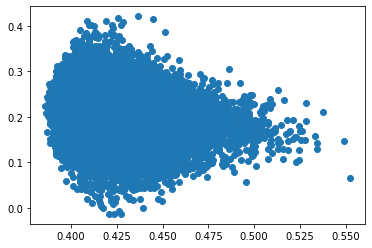

In [71]:
plt.plot(fx,sy,"o")

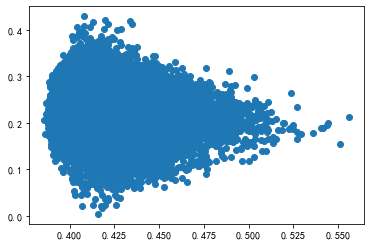

In [85]:
plt.plot(fx,sy,"o")

In [105]:
weights

array([0.37505798, 0.21652754, 0.31590981, 0.06087709, 0.03162758])

In [54]:
r_log.cov()*252

,sz000413,sz000063,sz002007,sz000001,sz000002
sz000413,0.419419,0.206114,0.190556,0.096228,0.080984
sz000063,0.206114,0.372807,0.212470,0.150696,0.144081
sz002007,0.190556,0.212470,0.327065,0.097002,0.075067
sz000001,0.096228,0.150696,0.097002,0.206068,0.138147
sz000002,0.080984,0.144081,0.075067,0.138147,0.231382


In [109]:
#returns

In [107]:
np.sum(np.dot(returns,weights))

nan

In [73]:
x=[]
y=[]
for i in range(1000):
    weights = np.random.random(5)
    weights = weights/np.sum(weights)
    y.append(np.sum(np.dot(r_log,weights)))
    x.append(np.sqrt(np.dot(weights.T, np.dot(r_log.cov()*252, weights))))
    

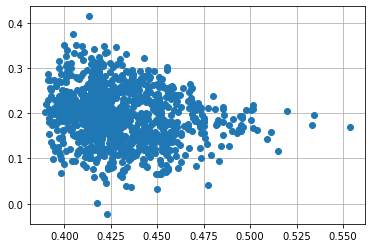

In [74]:
plt.plot(x,y,"o")
#plt.ylim(0,0.5)
plt.grid()

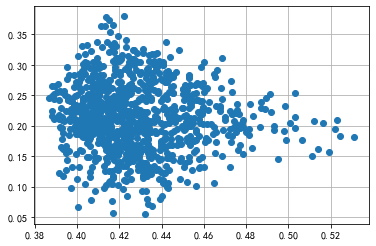

In [56]:
plt.plot(x,y,"o")
#plt.ylim(0,0.5)
plt.grid()

## 基于scipy.optimizet 的组合投资优化方法

In [75]:
def min_sharpe(weights):
    
    weights = weights/np.sum(weights)
    z_r=np.sum(np.dot(r_log,weights))
    z_f=np.sqrt(np.dot(weights.T, np.dot(r_log.cov()*252, weights)))

    return z_f/z_r#optimize是去最小值，所以这里用夏普率的倒数

In [58]:
min_sharpe(weights)

2.233350945279795

In [76]:
import scipy.optimize as sco

In [148]:
#help(sco)

In [77]:
noa=5
#约束是所有参数(权重)的总和为1。这可以用minimize函数的约定表达如下

cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数

bnds = tuple((0,1) for x in range(noa))

#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。

opts = sco.minimize(min_sharpe, noa*[1./noa,], method = 'SLSQP', bounds = bnds, constraints = cons)

opts

     fun: 0.8939093390352064
     jac: array([ 7.92866386e-01,  5.91352582e-05,  4.12997685e-01,  3.19267079e-01,
       -3.01741064e-04])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.00000000e+00, 8.36158658e-01, 0.00000000e+00, 1.83884121e-17,
       1.63841342e-01])

In [88]:
noa=len(stock_set)
#约束是所有参数(权重)的总和为1。这可以用minimize函数的约定表达如下

cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

#我们还将参数值(权重)限制在0和1之间。这些值以多个元组组成的一个元组形式提供给最小化函数

bnds = tuple((0,1) for x in range(noa))

#优化函数调用中忽略的唯一输入是起始参数列表(对权重的初始猜测)。我们简单的使用平均分布。

opts = sco.minimize(min_sharpe, noa*[1./noa,], method = 'SLSQP', bounds = bnds, constraints = cons)

opts

     fun: 0.8932822090559589
     jac: array([ 1.37371153e-01,  4.12706129e-01, -2.59153545e-04,  7.93547079e-01,
        5.06788492e-05])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([5.15901629e-17, 0.00000000e+00, 1.63572666e-01, 8.14224010e-17,
       8.36427334e-01])

In [78]:
sum(np.dot(r_log,opts["x"]))

0.48934441950407487

In [93]:
sum(np.dot(r_log,opts["x"]))

0.48946330119032233

In [61]:
opts['x'].round(3)

array([0.   , 0.   , 0.164, 0.   , 0.836])

In [133]:
#r_log

In [62]:
np.sum(np.dot(r_log,opts['x'].round(3)))

0.48936542038912945

In [79]:
np.sum(np.dot(r_log,opts['x'].round(3)))

0.48930805654399134

## classwork 4

上面是看夏普率最大
参考：https://zhuanlan.zhihu.com/p/20604930?refer=quantstory
找出投资收益率最大的组合权重